# House Prices: Advanced Regression Techniques

<p><a name="sections"></a></p>


## Sections

- <a href="#description">Description</a><br>
- <a href="#executive_summary">Executive Summary</a><br>
- <a href="#data_import">Data Import</a><br>
- <a href="#feature_engineering">Feature Engineering</a><br>
- <a href="#data_cleaning_and_eda">Data Cleaning and EDA</a><br>
- <a href="#models">Models</a><br>
    - <a href="#lasso">Lasso</a><br>
    - <a href="#decision_tree">Decision Tree</a><br>
    - <a href="#bagging">Bagging</a><br>
    - <a href="#random_forest">Random Forest</a><br>
    - <a href="#boosting">Boosting</a><br>
    - <a href="#xgboost">XGBoost</a><br>
- <a href="#submission">Submission</a><br>

<p><a name="description"></a></p>

## Description

<p><a name="executive_summary"></a></p>

## Executive Summary

<p><a name="data_import_and_cleaning"></a></p>

## Data Import and Cleaning

**import libaries**

In [188]:
import numpy as np
import pandas as pd
from scipy.stats import skew
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV,RidgeCV,ElasticNetCV
from sklearn.model_selection import cross_val_score, train_test_split,GridSearchCV
from sklearn.model_selection import RepeatedKFold
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import operator
from sklearn.metrics import mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, make_scorer, mean_squared_log_error
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.decomposition import PCA
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
#import xgboost as xgb
#import lightgbm as lgb

**read data**

In [189]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [190]:
print('number of training samples: {}'.format(train.shape[0]))
train.head()

number of training samples: 1460


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [191]:
print('number of testing samples: {}'.format(test.shape[0]))
test.head()

number of testing samples: 1459


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


**remove column id**

In [192]:
# set column Id as index
train.drop(['Id'],axis=1,inplace=True)
test.drop(['Id'],axis=1,inplace=True)
# set log of SalePrice as target column
SalePrice = train['SalePrice']
# remove SalePrice from training data
train = train.iloc[:,:-1]
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


**observe that SalePrice is non-normal distribution with skeweness and kurtosis**

skewness: 1.8828757597682129
kurtosis: 6.536281860064529


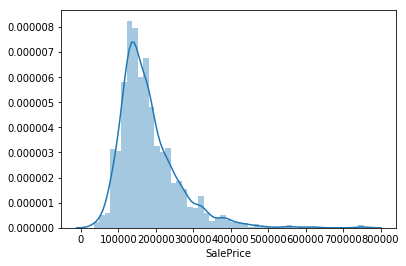

In [193]:
sns.distplot(SalePrice);
#skewness and kurtosis
print('skewness: {}'.format(SalePrice.skew()))
print('kurtosis: {}'.format(SalePrice.kurt()))

**noramlize by log transformation log(1+p)**

skewness: 0.12134661989685333
kurtosis: 0.809519155707878


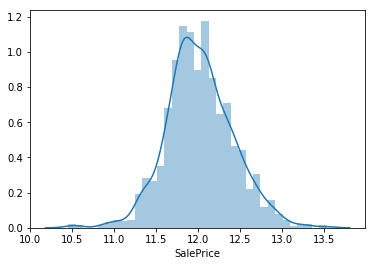

In [194]:
target = np.log1p(SalePrice)
sns.distplot(target);
#skewness and kurtosis
print('skewness: {}'.format(target.skew()))s
print('kurtosis: {}'.format(target.kurt()))

**remove outliers from train data:**
Two outliers with around 5,000 sq.ft. and $200,000 price

Text(0, 0.5, 'SalePrice')

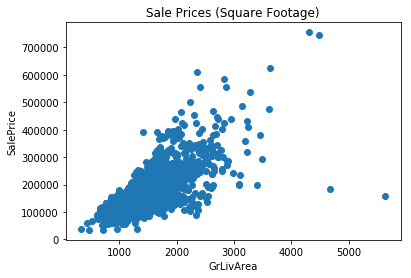

In [195]:
plt.scatter(train['GrLivArea'], SalePrice, marker='o')
plt.title("Sale Prices (Square Footage)")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")

Text(0, 0.5, 'SalePrice')

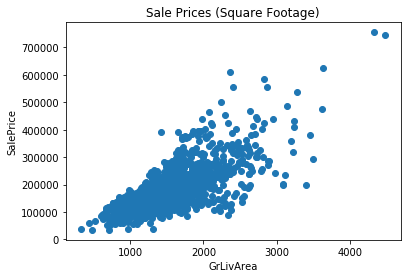

In [196]:
mask = ~((SalePrice < 300000) & (train['GrLivArea']>4000))
train = train[mask]
SalePrice = SalePrice[mask]
target = target[mask]
train.reset_index(inplace=True, drop=True)
SalePrice.reset_index(inplace=True, drop=True)
target.reset_index(inplace=True, drop=True)
plt.scatter(train['GrLivArea'], SalePrice, marker='o')
plt.title("Sale Prices (Square Footage)")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")

**combine train and test data**

In [197]:
data = pd.concat([train,test])
n_train = train.shape[0]
print('total number of training samples: {}'.format(n_train))
print('total number of samples: {}'.format(data.shape[0]))
data.reset_index(inplace=True)
data.head()

total number of training samples: 1458
total number of samples: 2917


,index,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


## Data Cleaning and EDA

**display percentage of NAs**

In [198]:
temp = data.isnull().any()
cols_na = temp[temp==True].index.tolist()
data_na = data.loc[:,cols_na].isnull().astype(int).mean().sort_values(ascending=False)
data_na

PoolQC          0.996915
MiscFeature     0.964004
Alley           0.932122
Fence           0.804251
FireplaceQu     0.486802
LotFrontage     0.166610
GarageFinish    0.054508
GarageYrBlt     0.054508
GarageQual      0.054508
GarageCond      0.054508
GarageType      0.053822
BsmtExposure    0.028111
BsmtCond        0.028111
BsmtQual        0.027768
BsmtFinType2    0.027425
BsmtFinType1    0.027083
MasVnrType      0.008228
MasVnrArea      0.007885
MSZoning        0.001371
BsmtFullBath    0.000686
BsmtHalfBath    0.000686
Utilities       0.000686
Functional      0.000686
Exterior2nd     0.000343
Exterior1st     0.000343
SaleType        0.000343
BsmtFinSF1      0.000343
BsmtFinSF2      0.000343
BsmtUnfSF       0.000343
Electrical      0.000343
KitchenQual     0.000343
GarageCars      0.000343
GarageArea      0.000343
TotalBsmtSF     0.000343
dtype: float64

**substitute NAs in categoric variables as None**

In [199]:
# Handle missing values for features where median/mean or most common value doesn't make sense
# some of the following are redundant
# Alley : data description says NA means "no alley access"
data['Alley'].fillna('None',inplace=True)

# BsmtQual etc : data description says NA for basement features is "no basement"
for col in ['BsmtFinType2','BsmtExposure','BsmtFinType1','BsmtCond','BsmtQual']:
    data[col].fillna('None',inplace=True)

# GarageType etc : data description says NA for garage features is "no garage"
for col in ['GarageType','GarageFinish','GarageQual','GarageCond']:
    data[col].fillna('None',inplace=True)
# GarageYrBlt: replace by mean
data['GarageYrBlt'].fillna(data['GarageYrBlt'].mean(),inplace=True)

for col in ['BsmtHalfBath','BsmtFullBath','Exterior1st','Exterior2nd','SaleType']:
    data[col].fillna(data[col].mode()[0],inplace=True)    

# replace by 0
for col in ['BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','BsmtUnfSF','GarageCars','GarageArea']:
    data[col].fillna(0,inplace=True)    

# EnclosedPorch : NA most likely means no enclosed porch
data['EnclosedPorch'].fillna(0,inplace=True)  
# OpenPorchSF : NA most likely means no open porch
data['OpenPorchSF'].fillna(0,inplace=True)  
# ScreenPorch : NA most likely means no screen porch
data['ScreenPorch'].fillna(0,inplace=True) 

# PoolQC : data description says NA means "no pool"
data['PoolQC'].fillna('None',inplace=True)
data['PoolArea'].fillna(0,inplace=True)

# FireplaceQu : data description says NA means "no fireplace"
data['FireplaceQu'].fillna('None',inplace=True)
data['Fireplaces'].fillna(0,inplace=True)

# fill NA by median value in the neighborhood
data['LotFrontage'] = data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
# LotShape : NA most likely means regular
data['LotShape'].fillna('Reg',inplace=True)

# MasVnrType : NA most likely means no veneer
data['MasVnrType'].fillna('None',inplace=True)
data['MasVnrArea'].fillna(0,inplace=True)

# MiscFeature : data description says NA means "no misc feature"
data['MiscFeature'].fillna('None',inplace=True)
data['MiscVal'].fillna(0,inplace=True)

# KitchenAbvGr : NA most likely means 0
data['KitchenAbvGr'].fillna(0,inplace=True)
# KitchenQual : NA most likely means typical
data['KitchenQual'].fillna('TA',inplace=True)

# Utilities : NA most likely means all public utilities
data['Utilities'].fillna('AllPub',inplace=True)
# Electrical: NA most likely means SBrkr
data['Electrical'].fillna('Electrical',inplace=True)

# SaleCondition : NA most likely means normal sale
data['SaleCondition'].fillna('Normal',inplace=True)
# PavedDrive : NA most likely means not paved
data['PavedDrive'].fillna('N',inplace=True)
data['TotRmsAbvGrd'].fillna(0,inplace=True)
# NAs from test data
data['MSZoning'] = data.groupby('Neighborhood')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))
# Fence : data description says NA means "no fence"
data['Fence'].fillna('None',inplace=True)
# Functional : data description says NA means typical
data['Functional'].fillna('Typ',inplace=True)
# HalfBath : NA most likely means no half baths above grade
data['HalfBath'].fillna(0,inplace=True)
# HeatingQC : NA most likely means typical
data['HeatingQC'].fillna('TA',inplace=True)

# Some numerical features are actually really categories
data = data.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })

<p><a name="data_cleaning_and_eda"></a></p>

## Feature Engineering

In [200]:
data['GrLivArea_log'] = np.log1p(data['GrLivArea'])
data['TotalBsmtSF'] = data['BsmtFinSF1'] + data['BsmtFinSF2'] + data['BsmtUnfSF']
data['TotalBsmtSF_log'] = np.log1p(data['BsmtFinSF1'] + data['BsmtFinSF2'] + data['BsmtUnfSF'])
data['TotalSF'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']
data['TotalSF_log'] = np.log1p(data['TotalSF'])
data['OverallQual_log'] = np.log1p(data['OverallQual'])
data['YearBuilt_log'] = np.log1p(data['YearBuilt'])
data['OverallCond_log'] = np.log1p(data['OverallCond'])

**divide data into numeric and categoric variables**

In [201]:
def divide_numeric_categoric(data):
    # numeric data
    data_numeric = data._get_numeric_data()
    # all columns
    cols_all = data.columns.tolist()
    # numeric columns
    cols_numeric = data_numeric.columns.tolist()
    # categoric columns
    cols_categoric = list(set(cols_all)-set(cols_numeric))
    return(cols_numeric,cols_categoric)

In [202]:
# numeric and categoric columns
numeric_cols,categoric_cols = divide_numeric_categoric(data)
print('numeric columns: {}'.format(len(numeric_cols)))
print('categoric columns: {}'.format(len(categoric_cols)))

numeric columns: 42
categoric columns: 45


**Merging categoric variables**

In [205]:
# dataT = data transformed
dataT = data.copy()

**sort categoric variables in descending order by number of categories**

In [206]:
def categoric_cols_descending(data):    
    cols_numeric, cols_categoric = divide_numeric_categoric(data)
    d = {col:len(pd.get_dummies(data[col]).columns.tolist()) for col in cols_categoric}
    d = sorted(d.items(),key=operator.itemgetter(1),reverse=True)
    return(d)
d = categoric_cols_descending(data)
d

[('Neighborhood', 25),
 ('MSSubClass', 16),
 ('Exterior2nd', 16),
 ('Exterior1st', 15),
 ('MoSold', 12),
 ('Condition1', 9),
 ('SaleType', 9),
 ('HouseStyle', 8),
 ('Condition2', 8),
 ('BsmtFinType1', 7),
 ('GarageType', 7),
 ('Functional', 7),
 ('BsmtFinType2', 7),
 ('RoofMatl', 7),
 ('SaleCondition', 6),
 ('GarageCond', 6),
 ('Electrical', 6),
 ('GarageQual', 6),
 ('Foundation', 6),
 ('RoofStyle', 6),
 ('FireplaceQu', 6),
 ('Heating', 6),
 ('BsmtQual', 5),
 ('BsmtCond', 5),
 ('MSZoning', 5),
 ('HeatingQC', 5),
 ('BsmtExposure', 5),
 ('BldgType', 5),
 ('ExterCond', 5),
 ('LotConfig', 5),
 ('Fence', 5),
 ('MiscFeature', 5),
 ('GarageFinish', 4),
 ('PoolQC', 4),
 ('MasVnrType', 4),
 ('KitchenQual', 4),
 ('ExterQual', 4),
 ('LotShape', 4),
 ('LandContour', 4),
 ('Alley', 3),
 ('PavedDrive', 3),
 ('LandSlope', 3),
 ('CentralAir', 2),
 ('Street', 2),
 ('Utilities', 2)]

**Library: merging categic variables using agglomerative clustering**

In [207]:
def prepare_clustering_data(data,n_train,SalePrice,col):
    # training set
    X = data[:n_train]
    # calculate SalePrice per square foot
    PPSqf = SalePrice/X['TotalSF']
    # encode categoric variables
    dummies = pd.get_dummies(X[col])
    # create dictionary of SalePrice by neighbourhood
    dict_logSalePrice = {}
    dict_PPSqf = {}
    for key in dummies.columns.tolist():
        mask = dummies[key].eq(1)
        dict_logSalePrice[key] = np.array(np.log1p(SalePrice[mask]).values)
        dict_PPSqf[key] = np.array(PPSqf[mask].values)
        # price per square foot: mean, median, min, max, 25th, 75th percentiles 
        dict_PPSqf = {k: [np.percentile(v, 5),np.percentile(v, 25),np.mean(v),np.median(v),\
                          np.percentile(v, 75),np.percentile(v, 95)] for k, v in dict_PPSqf.items()}
        # log sales price: mean, median, min, max, 25th, 75th percentiles 
        dict_logSalePrice = {k: [np.percentile(v, 5),np.percentile(v, 25),np.mean(v),np.median(v),\
                          np.percentile(v, 75),np.percentile(v, 95)] for k, v in dict_logSalePrice.items()}
        df = pd.concat([pd.DataFrame(dict_PPSqf),pd.DataFrame(dict_logSalePrice)],ignore_index=True)
    return(df)
    
def plot_dendrogram(df,col):
    # plot dendrogram    
    plt.figure(figsize=(10, 5))
    plt.title(col)
    labels_lst = list(map(lambda x: x.replace(col+'_',''),df.columns.tolist()))
    dend = shc.dendrogram(shc.linkage(df.T, method='ward'),labels=labels_lst,orientation='right')   
    
def clusters(data,n_train,SalePrice,col,n_clusters,scatter_plot=False):
    # encode categoric variables
    dummies = pd.get_dummies(data[col])
    # training samples
    X = data[:n_train]
    # prepare clustering data
    df = prepare_clustering_data(data,n_train,SalePrice,col)
    # save columns of df
    cols = df.columns.tolist()
    # create clustering object
    clustering = AgglomerativeClustering(n_clusters=n_clusters).fit(df.T)   
    labels = clustering.labels_
    if scatter_plot == True:
        fig = plt.figure(figsize=(10,5))
        plt.scatter(df.iloc[2], df.iloc[8], marker='o', c = labels, cmap='rainbow')
        for i in range(len(cols)):
            plt.text(df.iloc[2].tolist()[i]+.03, df.iloc[8].tolist()[i]+.03, cols[i], fontsize=7)
        plt.xlabel("mean price per sqft ($)")
        plt.ylabel("mean log price ($)")
        plt.grid(True)
        plt.title(col+': number of clusters = {}'.format(n_clusters))
    # find columns for label k
    find_cols = lambda k: [cols[i] for i in np.where(labels==k)[0].tolist()]
    dict_dummies = {}
    for k in range(n_clusters):
        key = '_'.join(find_cols(k))
        value = dummies.loc[:,find_cols(k)].sum(axis=1).values
        dict_dummies[key] = value 
    dummies_merged = pd.DataFrame(dict_dummies)
    merged = pd.DataFrame({col:dummies_merged.columns[np.where(dummies_merged!=0)[1]]})
    return(merged)

def find_n_clusters(data,n_train,SalePrice,col,max_clusters=None):
    # numeric columns
    data_numeric = data._get_numeric_data()
    cols_numeric = data_numeric.columns.tolist()    
    # categoric columns excluding column col
    cols_categoric = list(set(data.columns.tolist())-set(cols_numeric)-set([col]))
    # train data
    X = data[:n_train]
    X_ex_col = pd.concat([X.loc[:,cols_numeric], pd.get_dummies(X.loc[:,cols_categoric])], axis=1)
    # number of values of categoric variable col
    if max_clusters==None: max_clusters = pd.get_dummies(X[col]).shape[1]
    # testing error including single variable
    testing_error_lst = []
    # testing error including intereaction term
    testing_error_all_lst = []
    # loop over categoric values of col
    for i in range(2,max_clusters+1):
        print('Iteration: {} out of {}'.format(i,max_clusters))
        dummies_merged = pd.get_dummies(clusters(data,n_train,SalePrice,col,i))[:n_train]
        # repeated k-fold
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            training_error,testing_error = model_validation_score(dummies_merged,np.log1p(SalePrice),n_repeats=1)
            dataT = pd.concat([X_ex_col,dummies_merged],axis=1)
            dataT = (dataT - dataT.mean())/dataT.std()
            training_error_all,testing_error_all = \
                    model_validation_score(dataT,np.log1p(SalePrice),n_repeats=10)
        testing_error_lst.append(testing_error)      
        testing_error_all_lst.append(testing_error_all)          
    # plot testing errors
    f = plt.figure(figsize=(10,5))
    ax = f.add_subplot(121)
    ax2 = f.add_subplot(122)
    x = np.linspace(2,max_clusters+1,max_clusters-1)
    ax.plot(x, testing_error_lst,marker='o')
    ax.set_title(col+": single variable")
    ax.set_xlabel("number of clusters")
    ax.set_ylabel("testing error")
    ax.grid(True)
    ax2.plot(x, testing_error_all_lst,marker='o')
    ax2.set_title(col+": with interaction")
    ax2.set_xlabel("number of clusters")
    ax2.set_ylabel("testing error")
    ax2.grid(True)

           GarageCars
0     0.0_1.0_2.0_3.0
1     0.0_1.0_2.0_3.0
2     0.0_1.0_2.0_3.0
3     0.0_1.0_2.0_3.0
4     0.0_1.0_2.0_3.0
5     0.0_1.0_2.0_3.0
6     0.0_1.0_2.0_3.0
7     0.0_1.0_2.0_3.0
8     0.0_1.0_2.0_3.0
9     0.0_1.0_2.0_3.0
10    0.0_1.0_2.0_3.0
11    0.0_1.0_2.0_3.0
12    0.0_1.0_2.0_3.0
13    0.0_1.0_2.0_3.0
14    0.0_1.0_2.0_3.0
15    0.0_1.0_2.0_3.0
16    0.0_1.0_2.0_3.0
17    0.0_1.0_2.0_3.0
18    0.0_1.0_2.0_3.0
19    0.0_1.0_2.0_3.0
20    0.0_1.0_2.0_3.0
21    0.0_1.0_2.0_3.0
22    0.0_1.0_2.0_3.0
23    0.0_1.0_2.0_3.0
24    0.0_1.0_2.0_3.0
25    0.0_1.0_2.0_3.0
26    0.0_1.0_2.0_3.0
27    0.0_1.0_2.0_3.0
28    0.0_1.0_2.0_3.0
29    0.0_1.0_2.0_3.0
...               ...
2886  0.0_1.0_2.0_3.0
2887  0.0_1.0_2.0_3.0
2888  0.0_1.0_2.0_3.0
2889  0.0_1.0_2.0_3.0
2890  0.0_1.0_2.0_3.0
2891  0.0_1.0_2.0_3.0
2892  0.0_1.0_2.0_3.0
2893  0.0_1.0_2.0_3.0
2894  0.0_1.0_2.0_3.0
2895  0.0_1.0_2.0_3.0
2896  0.0_1.0_2.0_3.0
2897  0.0_1.0_2.0_3.0
2898  0.0_1.0_2.0_3.0
2899  0.0_

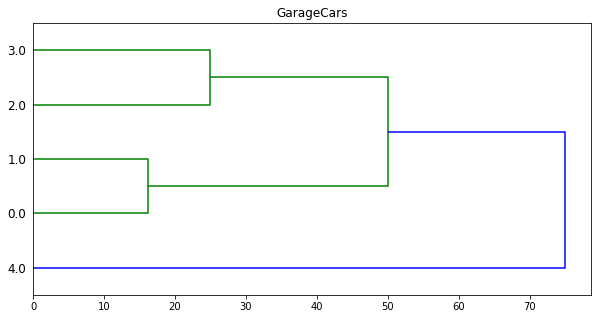

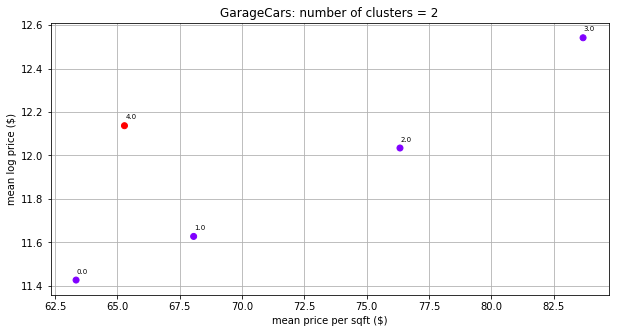

In [295]:
data_new = data.copy()
data_new['GarageCars'] = data_new['GarageCars'].astype(str)
col = 'GarageCars'
df = prepare_clustering_data(data_new,n_train,SalePrice,col)
plot_dendrogram(df,col)
print(clusters(data_new,n_train,SalePrice,col,2,scatter_plot=True))

**Determine optimal number of clusters for each categoric variable**

**run merge function for categoric variables 1 to 22. Warning: do not run cell as running takes a long time!**

Iteration: 2 out of 25
Iteration: 3 out of 25
Iteration: 4 out of 25
Iteration: 5 out of 25
Iteration: 6 out of 25
Iteration: 7 out of 25
Iteration: 8 out of 25
Iteration: 9 out of 25
Iteration: 10 out of 25
Iteration: 11 out of 25
Iteration: 12 out of 25
Iteration: 13 out of 25
Iteration: 14 out of 25
Iteration: 15 out of 25
Iteration: 16 out of 25
Iteration: 17 out of 25
Iteration: 18 out of 25
Iteration: 19 out of 25
Iteration: 20 out of 25
Iteration: 21 out of 25
Iteration: 22 out of 25
Iteration: 23 out of 25
Iteration: 24 out of 25
Iteration: 25 out of 25
Iteration: 2 out of 15
Iteration: 3 out of 15
Iteration: 4 out of 15
Iteration: 5 out of 15
Iteration: 6 out of 15
Iteration: 7 out of 15
Iteration: 8 out of 15
Iteration: 9 out of 15
Iteration: 10 out of 15
Iteration: 11 out of 15
Iteration: 12 out of 15
Iteration: 13 out of 15
Iteration: 14 out of 15
Iteration: 15 out of 15
Iteration: 2 out of 16
Iteration: 3 out of 16
Iteration: 4 out of 16
Iteration: 5 out of 16
Iteration: 6

C:\Users\tsyurmasto\Anaconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Iteration: 2 out of 6
Iteration: 3 out of 6
Iteration: 4 out of 6
Iteration: 5 out of 6
Iteration: 6 out of 6


C:\Users\tsyurmasto\Anaconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


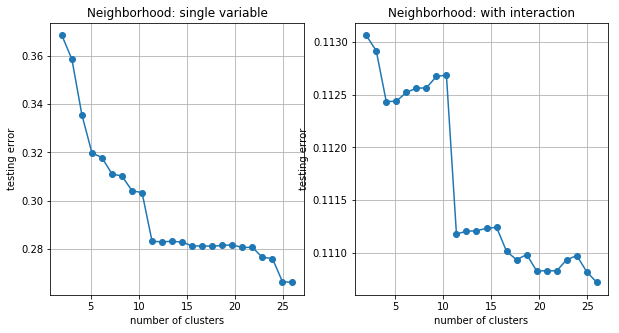

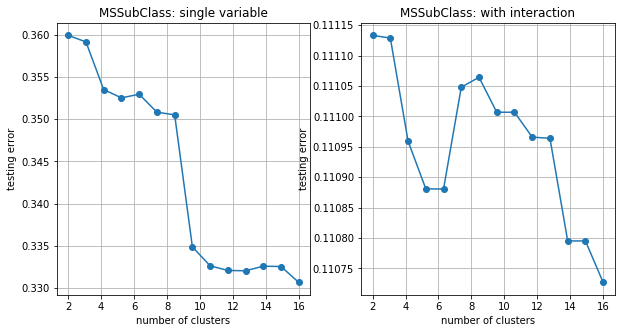

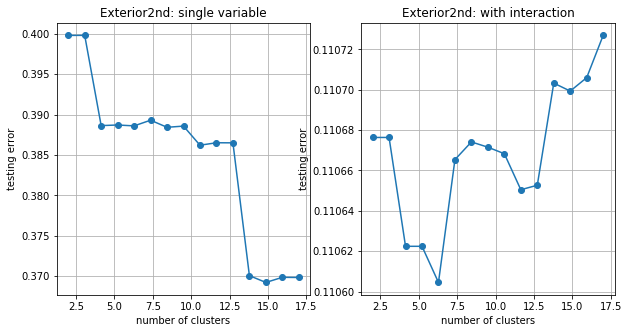

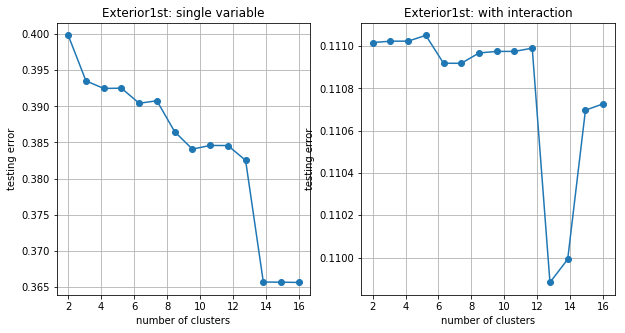

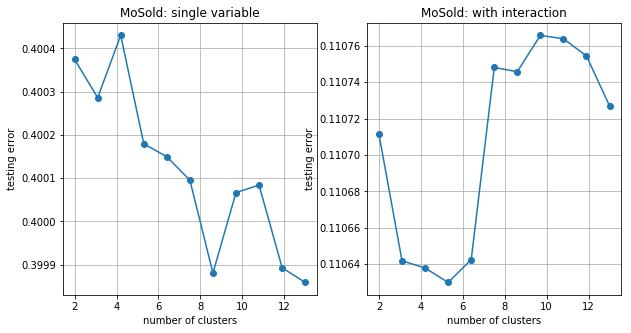

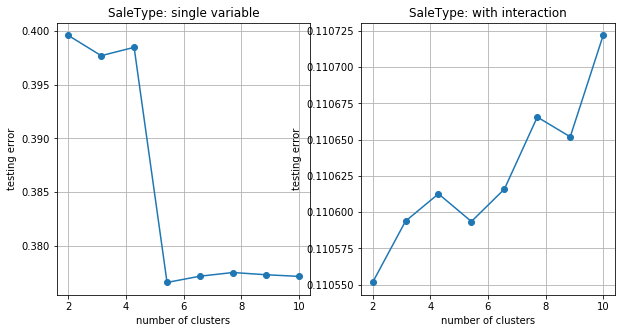

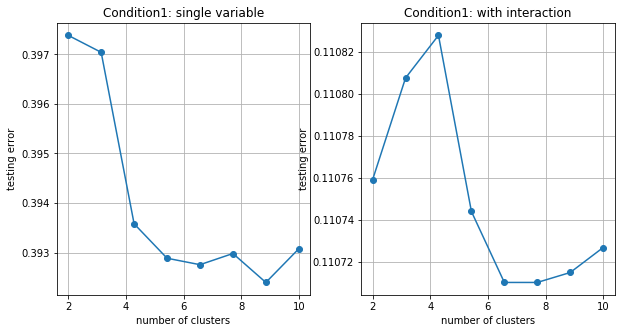

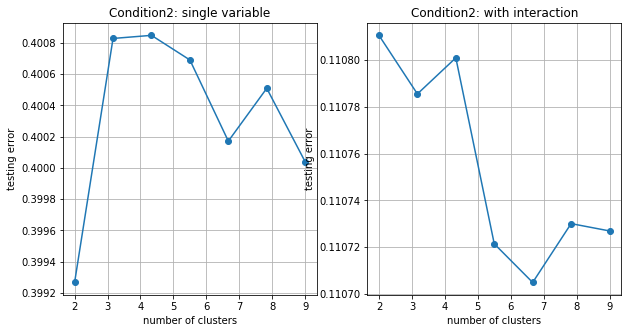

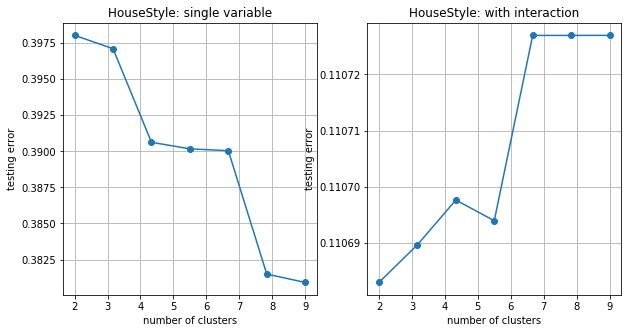

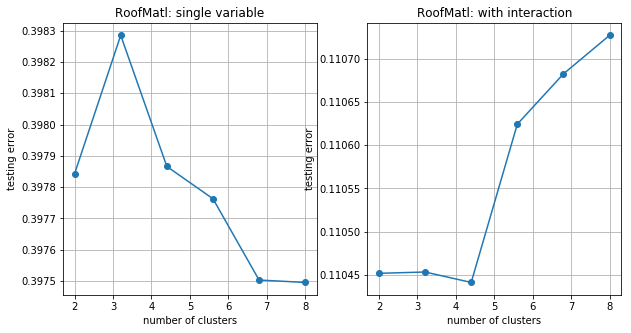

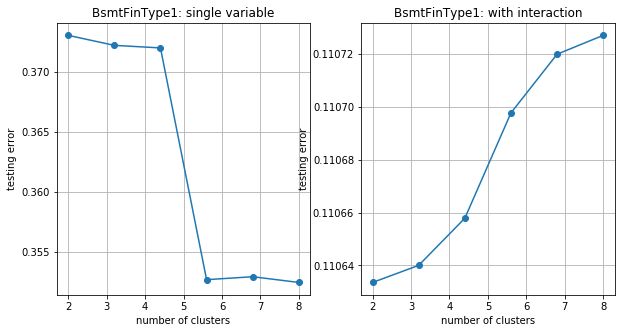

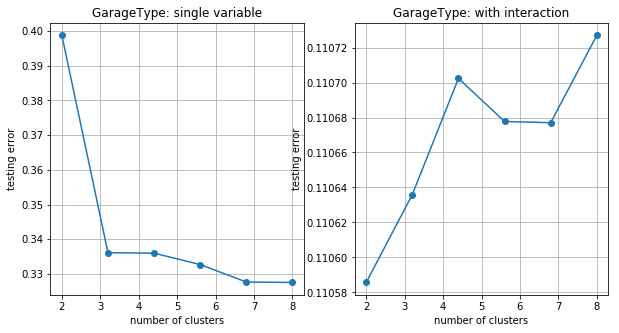

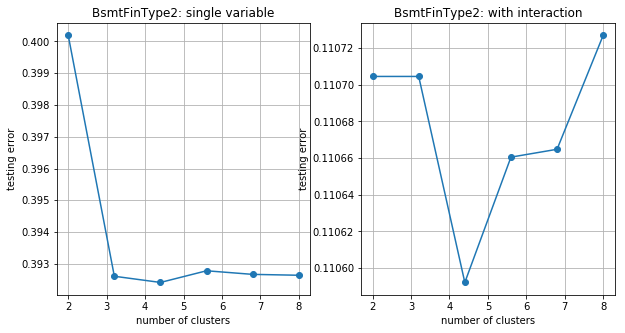

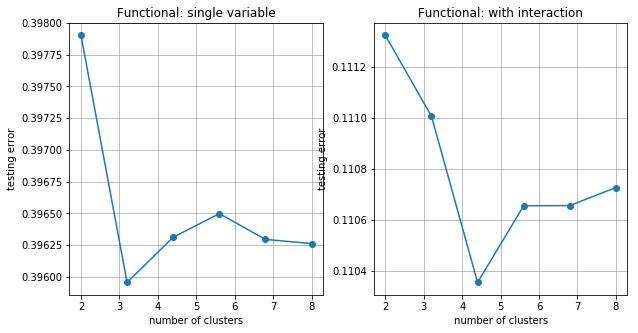

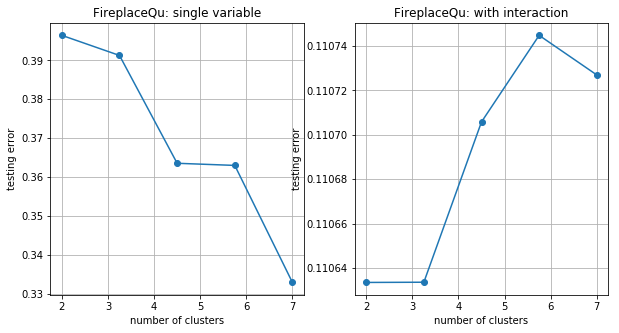

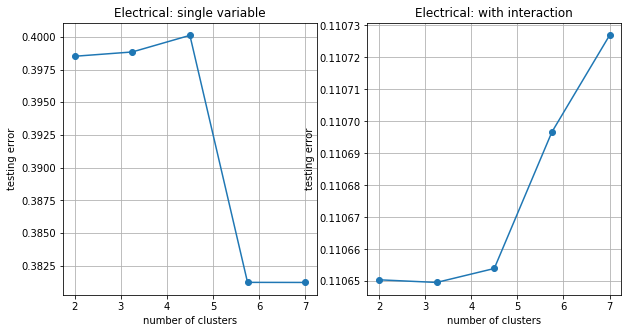

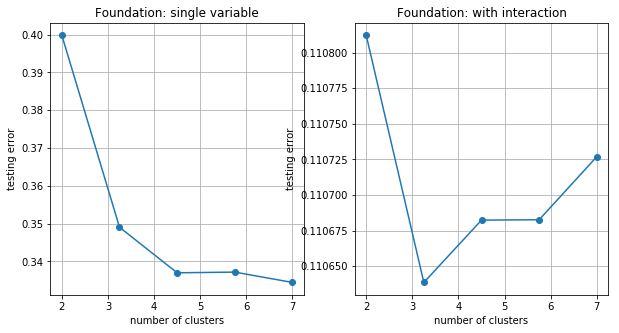

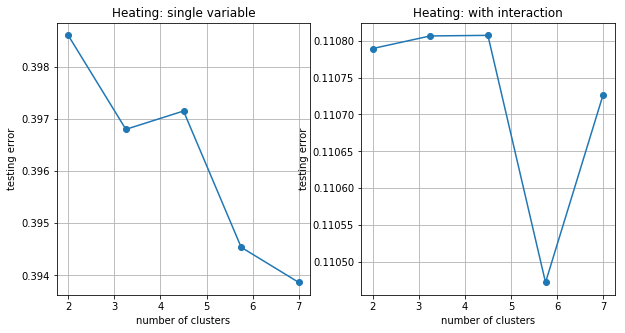

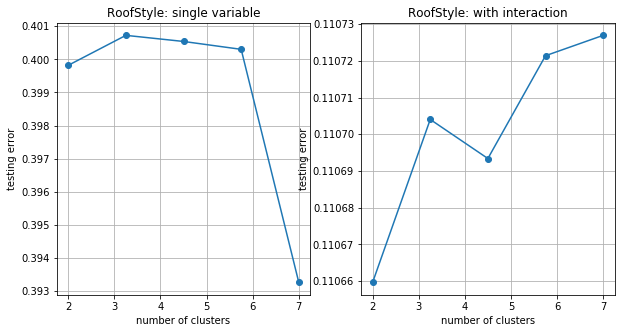

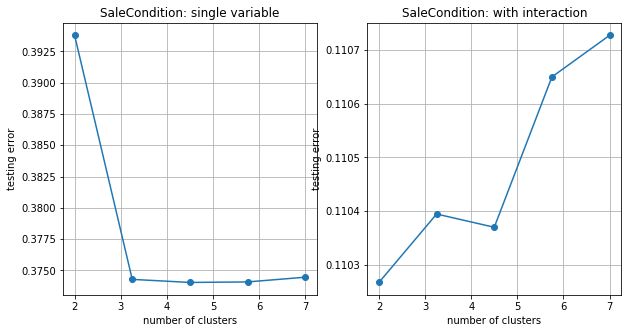

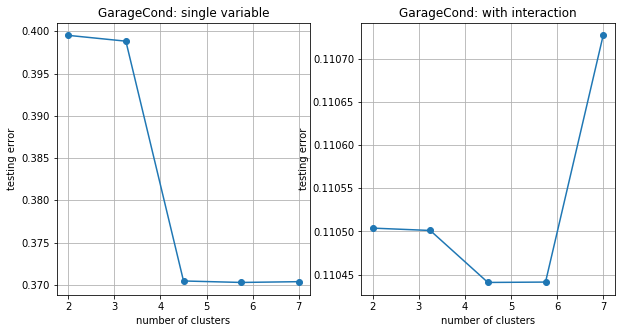

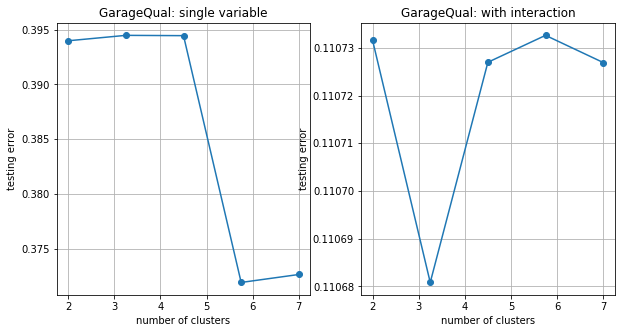

In [26]:
cols = [item[0] for item in d]
cols = cols[:22]
for col in cols:
    find_n_clusters(data,train.shape[0],SalePrice,col,max_clusters=None)

**run merge function for categoric variables 23 to 45. Warning: do not run cell as running takes a long time!**

Iteration: 2 out of 5
Iteration: 3 out of 5
Iteration: 4 out of 5
Iteration: 5 out of 5
Iteration: 2 out of 5
Iteration: 3 out of 5
Iteration: 4 out of 5
Iteration: 5 out of 5
Iteration: 2 out of 5
Iteration: 3 out of 5
Iteration: 4 out of 5
Iteration: 5 out of 5
Iteration: 2 out of 5
Iteration: 3 out of 5
Iteration: 4 out of 5
Iteration: 5 out of 5
Iteration: 2 out of 5
Iteration: 3 out of 5
Iteration: 4 out of 5
Iteration: 5 out of 5
Iteration: 2 out of 5
Iteration: 3 out of 5
Iteration: 4 out of 5
Iteration: 5 out of 5
Iteration: 2 out of 5
Iteration: 3 out of 5
Iteration: 4 out of 5
Iteration: 5 out of 5
Iteration: 2 out of 5
Iteration: 3 out of 5
Iteration: 4 out of 5
Iteration: 5 out of 5
Iteration: 2 out of 5
Iteration: 3 out of 5
Iteration: 4 out of 5
Iteration: 5 out of 5
Iteration: 2 out of 5
Iteration: 3 out of 5
Iteration: 4 out of 5
Iteration: 5 out of 5
Iteration: 2 out of 4
Iteration: 3 out of 4
Iteration: 4 out of 4
Iteration: 2 out of 4
Iteration: 3 out of 4
Iteration:

C:\Users\tsyurmasto\Anaconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Iteration: 2 out of 2


C:\Users\tsyurmasto\Anaconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Iteration: 2 out of 2


C:\Users\tsyurmasto\Anaconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


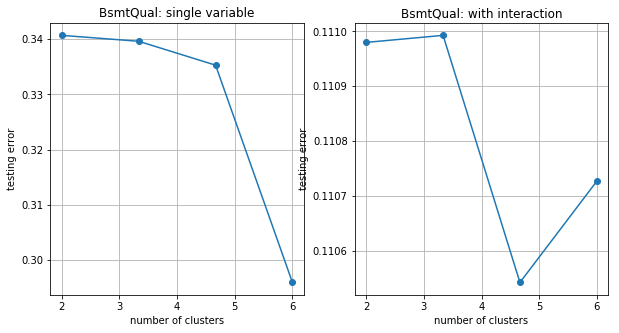

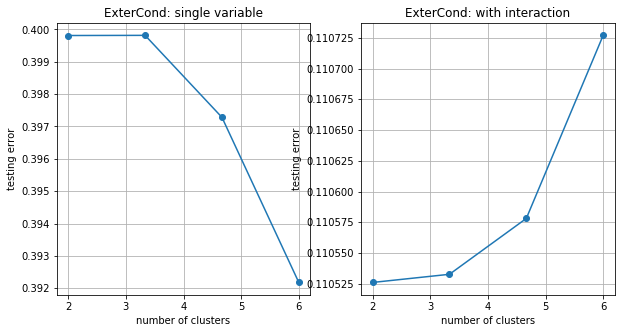

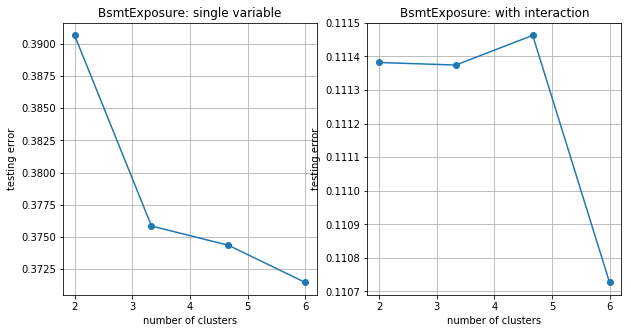

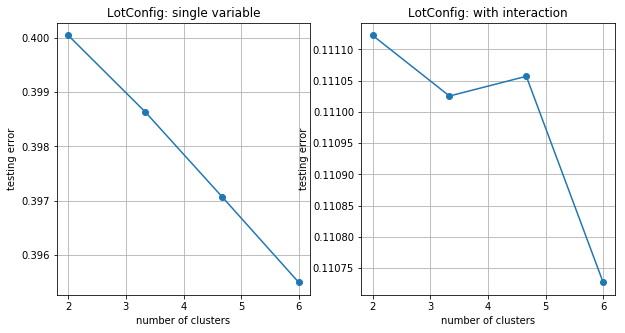

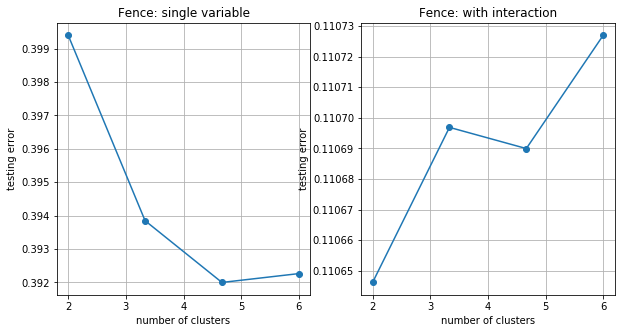

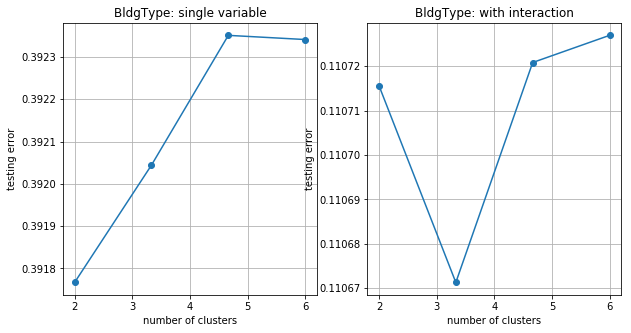

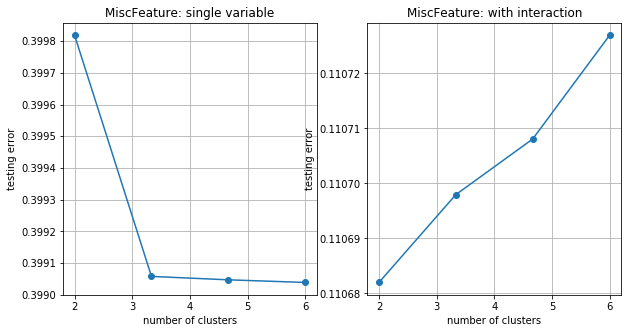

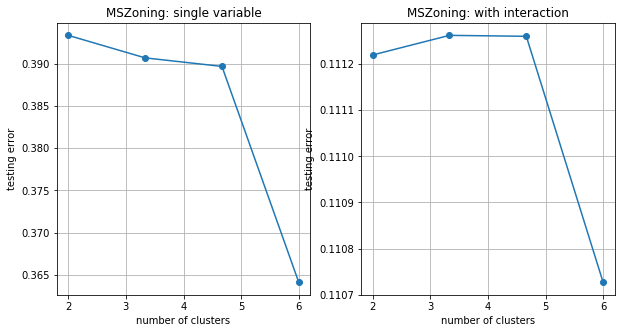

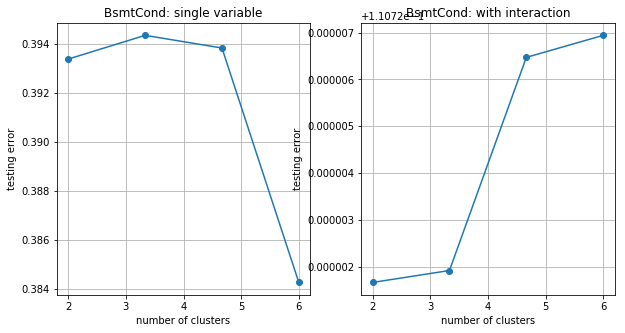

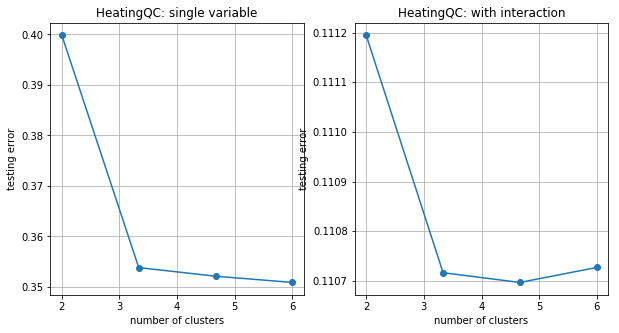

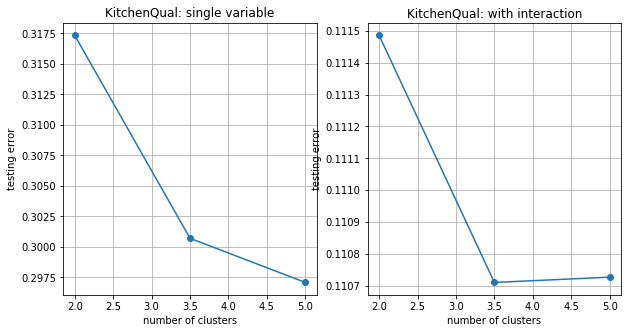

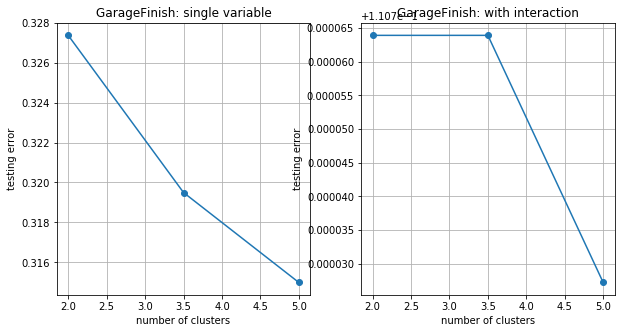

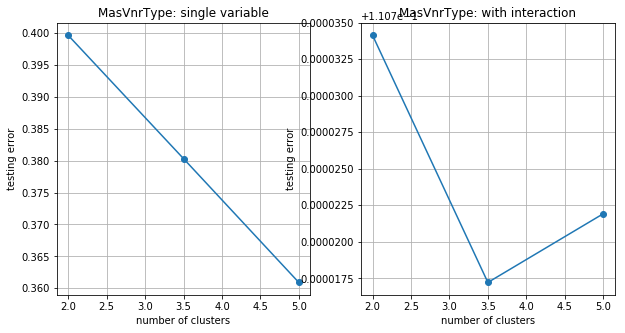

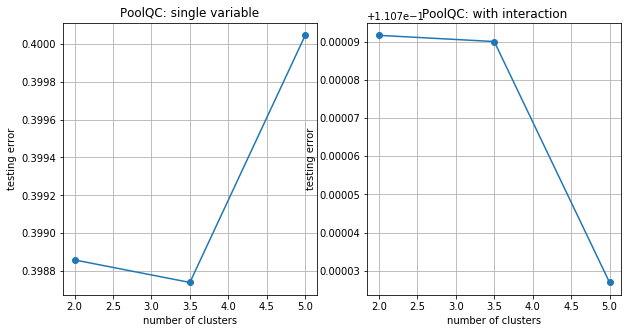

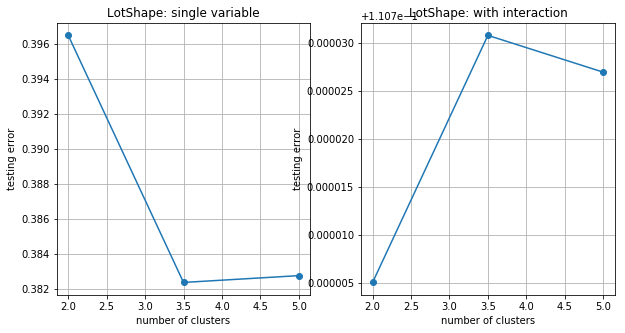

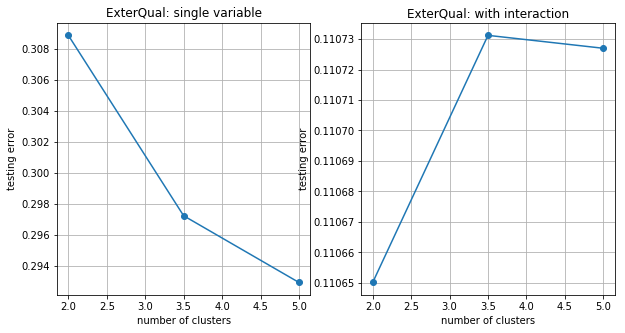

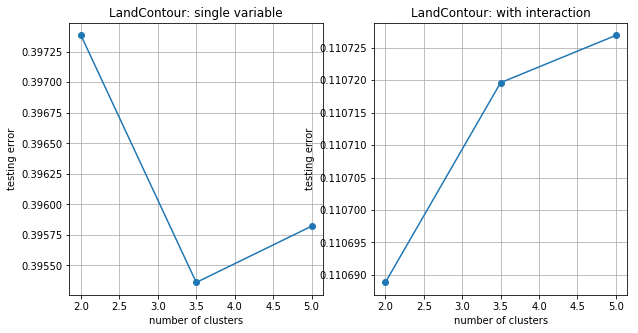

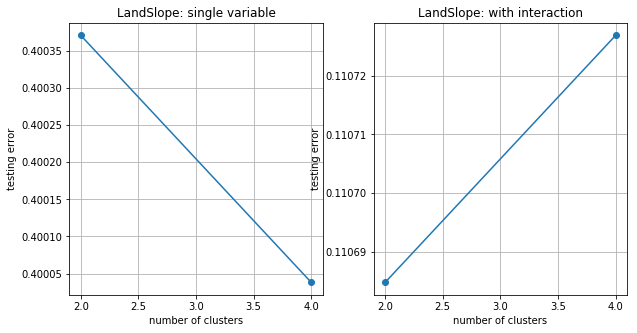

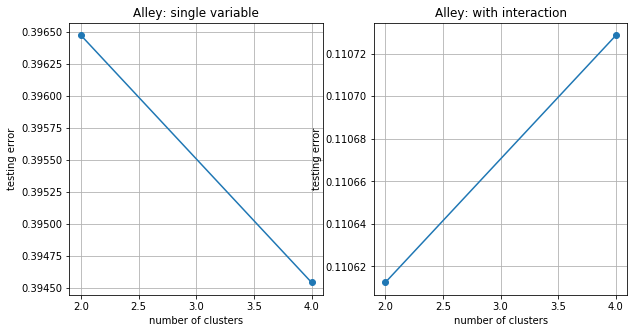

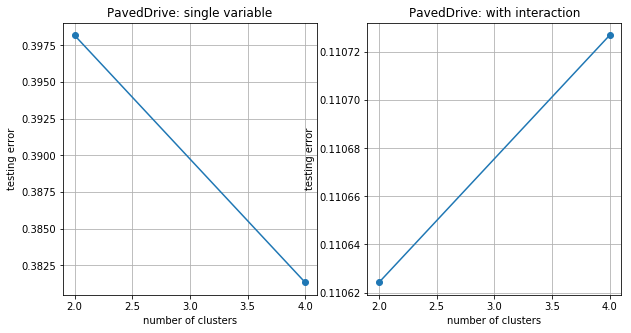

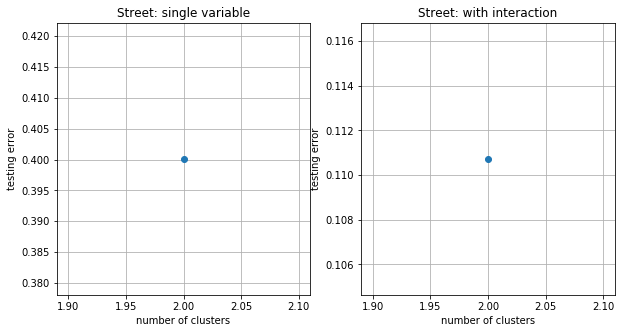

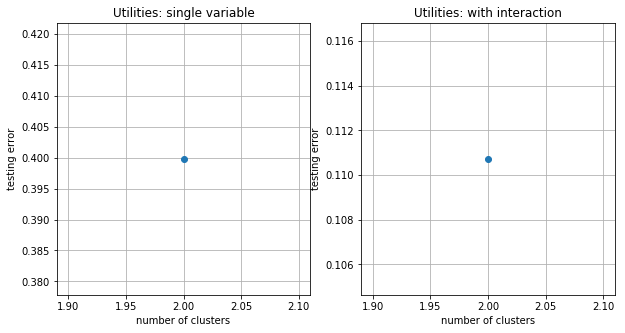

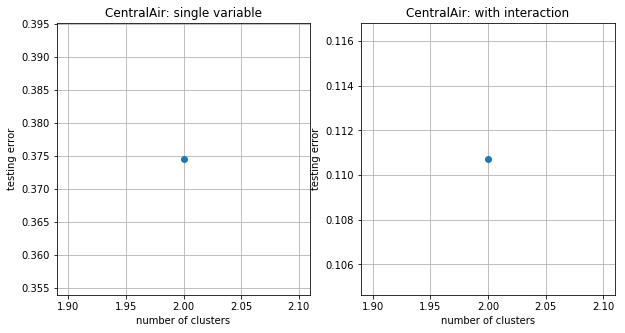

In [27]:
cols = [item[0] for item in d]
cols = cols[22:]
for col in cols:
    find_n_clusters(data,train.shape[0],SalePrice,col,max_clusters=None)

**merge clusters for categoric variables**

In [209]:
dataTcopy = dataT.copy

In [281]:
## FIX bug with NAs
col = 'MSSubClass'
# training set
X = data[:n_train]
# calculate SalePrice per square foot
PPSqf = SalePrice/X['TotalSF']
# encode categoric variables
dummies = pd.get_dummies(X[col])
# create dictionary of SalePrice by neighbourhood
#dict_logSalePrice = {}
#dict_PPSqf = {}
#for key in dummies.columns.tolist():
#    mask = dummies[key].eq(1)
#    dict_logSalePrice[key] = np.array(np.log1p(SalePrice[mask]).values)
#    dict_PPSqf[key] = np.array(PPSqf[mask].values)
#    # price per square foot: mean, median, min, max, 25th, 75th percentiles 
#    dict_PPSqf = {k: [np.min(v),np.percentile(v, 25),np.mean(v),np.median(v),\
#                      np.percentile(v, 75),np.max(v)] for k, v in dict_PPSqf.items()}
#    # log sales price: mean, median, min, max, 25th, 75th percentiles 
#    dict_logSalePrice = {k: [np.min(v),np.percentile(v, 25),np.mean(v),np.median(v),\
#                      np.percentile(v, 75),np.max(v)] for k, v in dict_logSalePrice.items()}
#    df = pd.concat([pd.DataFrame(dict_PPSqf),pd.DataFrame(dict_logSalePrice)],ignore_index=True)
pd.get_dummies(data[['MSSubClass']].head())

,MSSubClass_SC20,MSSubClass_SC60,MSSubClass_SC70
0,0,1,0
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0


In [93]:
dataT[optimal_n_clusters.keys()].head()

,Neighborhood,Exterior2nd,MSSubClass,Exterior1st,MoSold,SaleType,Condition1,HouseStyle,Condition2,GarageType,...,PoolQC,GarageFinish,ExterQual,MasVnrType,LotShape,LandContour,KitchenQual,Alley,LandSlope,PavedDrive
0,CollgCr_Timber_Veenker,CmentBd_MetalSd_VinylSd,SC120_SC20_SC60,VinylSd,Aug_Dec_Feb_Jul_Jun_May_Nov_Sep,COD_CWD_ConLD_ConLI_ConLw_New_Oth_WD,Norm,1.5Fin_1Story_2.5Fin_2Story_SFoyer_SLvl,Norm_PosA_PosN_RRNn,Attchd_BuiltIn_Detchd_None,...,None,Fin_RFn,Ex_Gd,BrkFace_None_Stone,IR1_Reg,HLS_Low_Lvl,Gd,None,Gtl_Mod,N_Y
1,CollgCr_Timber_Veenker,CmentBd_MetalSd_VinylSd,SC120_SC20_SC60,MetalSd,Aug_Dec_Feb_Jul_Jun_May_Nov_Sep,COD_CWD_ConLD_ConLI_ConLw_New_Oth_WD,Artery_Feedr_PosA_PosN_RRAe_RRAn_RRNe_RRNn,1.5Fin_1Story_2.5Fin_2Story_SFoyer_SLvl,Norm_PosA_PosN_RRNn,Attchd_BuiltIn_Detchd_None,...,None,Fin_RFn,Fa_TA,BrkFace_None_Stone,IR1_Reg,HLS_Low_Lvl,Fa_TA,None,Gtl_Mod,N_Y
2,CollgCr_Timber_Veenker,CmentBd_MetalSd_VinylSd,SC120_SC20_SC60,VinylSd,Aug_Dec_Feb_Jul_Jun_May_Nov_Sep,COD_CWD_ConLD_ConLI_ConLw_New_Oth_WD,Norm,1.5Fin_1Story_2.5Fin_2Story_SFoyer_SLvl,Norm_PosA_PosN_RRNn,Attchd_BuiltIn_Detchd_None,...,None,Fin_RFn,Ex_Gd,BrkFace_None_Stone,IR1_Reg,HLS_Low_Lvl,Gd,None,Gtl_Mod,N_Y
3,Crawfor_Somerst,AsbShng_Brk Cmn_BrkFace_HdBoard_Plywood_Stucco...,SC50_SC70_SC75,Wd Sdng,Aug_Dec_Feb_Jul_Jun_May_Nov_Sep,COD_CWD_ConLD_ConLI_ConLw_New_Oth_WD,Norm,1.5Fin_1Story_2.5Fin_2Story_SFoyer_SLvl,Norm_PosA_PosN_RRNn,Attchd_BuiltIn_Detchd_None,...,None,None_Unf,Fa_TA,BrkFace_None_Stone,IR1_Reg,HLS_Low_Lvl,Gd,None,Gtl_Mod,N_Y
4,Gilbert_NoRidge,CmentBd_MetalSd_VinylSd,SC120_SC20_SC60,VinylSd,Aug_Dec_Feb_Jul_Jun_May_Nov_Sep,COD_CWD_ConLD_ConLI_ConLw_New_Oth_WD,Norm,1.5Fin_1Story_2.5Fin_2Story_SFoyer_SLvl,Norm_PosA_PosN_RRNn,Attchd_BuiltIn_Detchd_None,...,None,Fin_RFn,Ex_Gd,BrkFace_None_Stone,IR1_Reg,HLS_Low_Lvl,Gd,None,Gtl_Mod,N_Y


In [187]:
# output transformed data
dataT.to_csv("data_merged.csv", index=False)
dataT.tail()

,index,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,YrSold,SaleType,SaleCondition,GrLivArea_log,TotalBsmtSF_log,TotalSF,TotalSF_log,OverallQual_log,YearBuilt_log,OverallCond_log
2912,1454,SC160_SC40_SC45,RM,21.0,1936,Pave,None,IR1_Reg,HLS_Low_Lvl,AllPub,...,2006,COD_CWD_ConLD_ConLI_ConLw_New_Oth_WD,Normal_Partial,6.996681,6.304449,1638.0,7.401842,1.609438,7.586296,2.079442
2913,1455,SC120_SC20_SC60,RM,21.0,1894,Pave,None,IR1_Reg,HLS_Low_Lvl,AllPub,...,2006,COD_CWD_ConLD_ConLI_ConLw_New_Oth_WD,Abnorml_AdjLand_Alloca_Family,6.996681,6.304449,1638.0,7.401842,1.609438,7.586296,1.791759
2914,1456,SC180_SC80_SC85,RL,160.0,20000,Pave,None,IR1_Reg,HLS_Low_Lvl,AllPub,...,2006,COD_CWD_ConLD_ConLI_ConLw_New_Oth_WD,Abnorml_AdjLand_Alloca_Family,7.110696,7.110696,2448.0,7.803435,1.791759,7.581210,2.079442
2915,1457,SC120_SC20_SC60,RL,62.0,10441,Pave,None,IR1_Reg,HLS_Low_Lvl,AllPub,...,2006,COD_CWD_ConLD_ConLI_ConLw_New_Oth_WD,Normal_Partial,6.878326,6.816736,1882.0,7.540622,1.791759,7.597396,1.791759
2916,1458,NaN,RL,74.0,9627,Pave,None,IR1_Reg,HLS_Low_Lvl,AllPub,...,2006,COD_CWD_ConLD_ConLI_ConLw_New_Oth_WD,Normal_Partial,7.601402,6.904751,2996.0,8.005367,2.079442,7.597898,1.791759


**encode categoric features, drop duplicates**

In [94]:
def encode_features(data,n_train): 
    cols_numeric,cols_categoric = divide_numeric_categoric(data)
    data_categoric = data.loc[:,cols_categoric]
    data_numeric = data.loc[:,cols_numeric]
    # encode categoric variables on entire data
    dummies = pd.get_dummies(data_categoric)
    # drop duplicates on train data along axis=1
    dummies_train = dummies.iloc[:n_train,:]
    dummies_train = dummies_train.T.drop_duplicates().T
    # find columns
    cols = dummies_train.columns.tolist()
    dummies = dummies.loc[:,cols]
    print('total number of features: {}'.format(len(dummies.columns.tolist())+len(cols_numeric)))
    print('{}'.format(len(cols_categoric)),'categoric','+','{} numeric'.format(len(cols_numeric)),'-->',\
         '{}'.format(len(dummies.columns.tolist())),'categoric encoded','+','{} numeric'.format(len(cols_numeric)))
    # combine numeric columns, encoded categoric columns, encoded NAs in numeric columns
    data_combined = pd.concat([dummies,data_numeric],axis=1)
    return(data_combined)

**number of feature before merging**

In [95]:
data = encode_features(data,n_train)
data.head()

total number of features: 329
45 categoric + 42 numeric --> 287 categoric encoded + 42 numeric


,CentralAir_N,CentralAir_Y,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,GarageCond_Ex,GarageCond_Fa,...,PoolArea,MiscVal,YrSold,GrLivArea_log,TotalBsmtSF_log,TotalSF,TotalSF_log,OverallQual_log,YearBuilt_log,OverallCond_log
0,0,1,0,0,0,0,1,0,0,0,...,0,0,2008,7.444833,6.753438,2566.0,7.850493,2.079442,7.602900,1.791759
1,0,1,0,0,0,0,1,0,0,0,...,0,0,2007,7.141245,7.141245,2524.0,7.833996,1.945910,7.589336,2.197225
2,0,1,0,0,0,0,1,0,0,0,...,0,0,2008,7.488294,6.825460,2706.0,7.903596,2.079442,7.601902,1.791759
3,0,1,1,0,0,0,0,0,0,0,...,0,0,2006,7.448916,6.629363,2473.0,7.813592,2.079442,7.557995,1.791759
4,0,1,0,0,0,0,1,0,0,0,...,0,0,2008,7.695758,7.044033,3343.0,8.114923,2.197225,7.601402,1.791759


**number of feature after merging**

In [96]:
dataT = encode_features(dataT,n_train)
dataT.head()

total number of features: 164
45 categoric + 42 numeric --> 122 categoric encoded + 42 numeric


,CentralAir_N,CentralAir_Y,SaleCondition_Abnorml_AdjLand_Alloca_Family,SaleCondition_Normal_Partial,GarageCond_Ex_Gd_Po,GarageCond_Fa_None_TA,GarageFinish_Fin_RFn,GarageFinish_None_Unf,PoolQC_Ex_Fa_Gd,PoolQC_None,...,PoolArea,MiscVal,YrSold,GrLivArea_log,TotalBsmtSF_log,TotalSF,TotalSF_log,OverallQual_log,YearBuilt_log,OverallCond_log
0,0,1,0,1,0,1,1,0,0,1,...,0,0,2008,7.444833,6.753438,2566.0,7.850493,2.079442,7.602900,1.791759
1,0,1,0,1,0,1,1,0,0,1,...,0,0,2007,7.141245,7.141245,2524.0,7.833996,1.945910,7.589336,2.197225
2,0,1,0,1,0,1,1,0,0,1,...,0,0,2008,7.488294,6.825460,2706.0,7.903596,2.079442,7.601902,1.791759
3,0,1,1,0,0,1,0,1,0,1,...,0,0,2006,7.448916,6.629363,2473.0,7.813592,2.079442,7.557995,1.791759
4,0,1,0,1,0,1,1,0,0,1,...,0,0,2008,7.695758,7.044033,3343.0,8.114923,2.197225,7.601402,1.791759


**standardize all variables**

In [97]:
def standardize(data): return((data - data.mean())/data.std())
data = standardize(data)

In [98]:
dataT = standardize(dataT)

**select transformed traning set**

In [99]:
X = data[:n_train]
XT = dataT[:n_train]
# save target in series y
y = target
print('number of training samples: {}'.format(X.shape[0]))
X.head()

number of training samples: 1458


,CentralAir_N,CentralAir_Y,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,GarageCond_Ex,GarageCond_Fa,...,PoolArea,MiscVal,YrSold,GrLivArea_log,TotalBsmtSF_log,TotalSF,TotalSF_log,OverallQual_log,YearBuilt_log,OverallCond_log
0,-0.268342,0.268342,-0.263912,-0.06426,-0.091066,-0.126557,0.462959,-0.301403,-0.032081,-0.161307,...,-0.060437,-0.089608,0.157422,0.570119,0.020083,0.030059,0.179775,0.685266,1.041414,-0.435542
1,-0.268342,0.268342,-0.263912,-0.06426,-0.091066,-0.126557,0.462959,-0.301403,-0.032081,-0.161307,...,-0.060437,-0.089608,-0.602844,-0.369466,0.348166,-0.023713,0.126781,0.040221,0.162334,1.905216
2,-0.268342,0.268342,-0.263912,-0.06426,-0.091066,-0.126557,0.462959,-0.301403,-0.032081,-0.161307,...,-0.060437,-0.089608,0.157422,0.704626,0.081013,0.209300,0.350363,0.685266,0.976705,-0.435542
3,-0.268342,0.268342,3.787837,-0.06426,-0.091066,-0.126557,-2.159277,-0.301403,-0.032081,-0.161307,...,-0.060437,-0.089608,-1.363111,0.582755,-0.084884,-0.089008,0.061233,0.685266,-1.868765,-0.435542
4,-0.268342,0.268342,-0.263912,-0.06426,-0.091066,-0.126557,0.462959,-0.301403,-0.032081,-0.161307,...,-0.060437,-0.089608,0.157422,1.346715,0.265925,1.024846,1.029225,1.254237,0.944326,-0.435542


<p><a name="models"></a></p>   

## Models 

**repeated k-fold cross-validation - input parameter to models**

In [100]:
repeatedkfold = RepeatedKFold()
rkf = RepeatedKFold(n_splits=10, n_repeats=1, random_state=2652124)

**define models**

In [132]:
# lasso model
lassocv = LassoCV(cv=rkf,n_alphas=1000,n_jobs=-1)
# ridge model
ridgecv = RidgeCV(cv=rkf)
# elastic net
elasticnetcv = ElasticNetCV(cv=rkf,n_alphas=100)
# random forest
rf = RandomForestRegressor(random_state = 42)
# kernel ridge
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
# gradient boosting
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
"""
# XG boost
xgboost = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
# 
lightgboost = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
"""

"\n# XG boost\nxgboost = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, \n                             learning_rate=0.05, max_depth=3, \n                             min_child_weight=1.7817, n_estimators=2200,\n                             reg_alpha=0.4640, reg_lambda=0.8571,\n                             subsample=0.5213, silent=1,\n                             random_state =7, nthread = -1)\n# \nlightgboost = lgb.LGBMRegressor(objective='regression',num_leaves=5,\n                              learning_rate=0.05, n_estimators=720,\n                              max_bin = 55, bagging_fraction = 0.8,\n                              bagging_freq = 5, feature_fraction = 0.2319,\n                              feature_fraction_seed=9, bagging_seed=9,\n                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)\n"

<p><a name="lasso"></a></p>

## Models: Lasso

In [121]:
# returns trained lasso model
def lasso_wrapper(X,y):
    reg = lassocv.fit(X,y)
    mse_path = np.mean(reg.mse_path_,axis=1)
    fig = plt.figure(figsize=(5,5))
    plt.plot(mse_path,color='blue',linewidth=1)
    plt.legend()
    plt.show()
    return(reg)
def lasso_plot_coef(reg,X):
    cols=X.columns.tolist()
    coefs = pd.Series(reg.coef_.tolist(),index=cols)
    coefs = coefs[coefs!=0]
    print('number of features: {}'.format(len(coefs)))
    coefs = coefs.sort_values(ascending=False)
    objects = coefs.index.tolist()
    y_arange = np.arange(len(objects))
    values = coefs.tolist()
    fig = plt.figure(figsize=(6,20))
    plt.barh(y_arange, values, align='center')
    plt.yticks(y_arange, objects)
    plt.xlabel('Features')
    plt.title('Feature Importance')
    plt.show()
    return(coefs,reg.intercept_)

**train lasso on data before merging categoric variables**

No handles with labels found to put in legend.


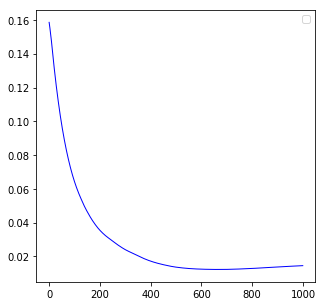

number of features: 125


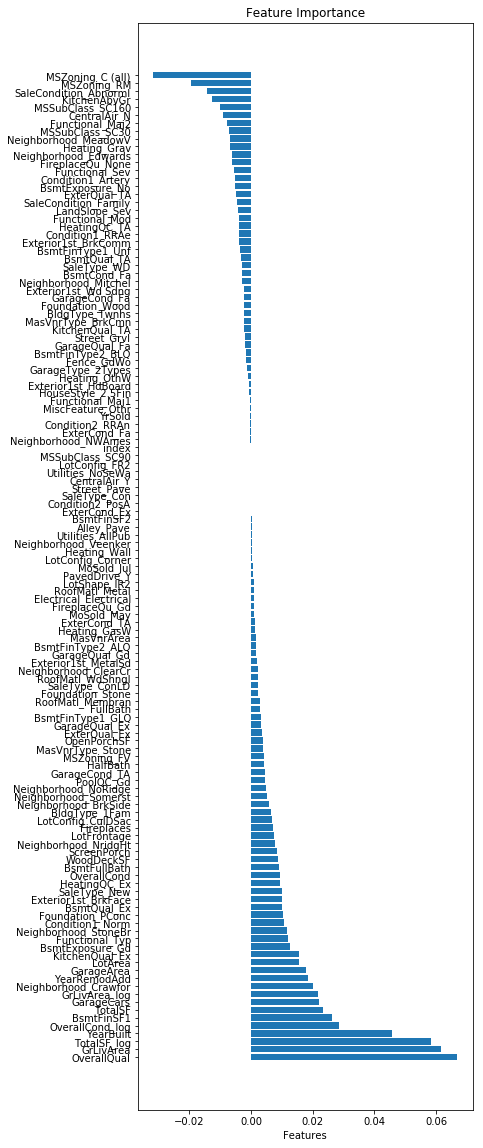

In [122]:
# train lasso
reg = lasso_wrapper(X,y)
# plot coefficients
coefs,reg.intercept_ = lasso_plot_coef(reg,X)

**estimate sale prices**

No handles with labels found to put in legend.


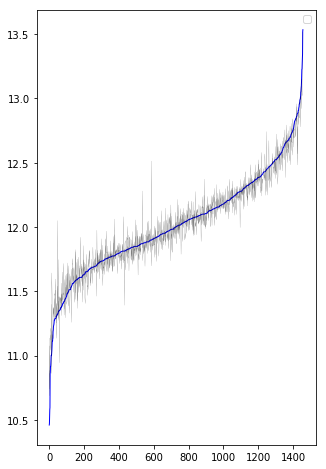

In [123]:
def estimate_prices(X):
    y_estimated = lassocv.predict(X)
    df_y = pd.DataFrame({'y':y,'y_estimated':y_estimated}).sort_values('y')
    fig = plt.figure(figsize=(5,8))
    plt.plot(df_y['y'].tolist(),color='blue',linewidth=1)
    plt.plot(df_y['y_estimated'].tolist(),color='black',linewidth=0.1)
    plt.legend()
    plt.show()
    df_y.head()

# plot estimate
estimate_prices(X)

**train lasso on data after merging categoric variables**

No handles with labels found to put in legend.


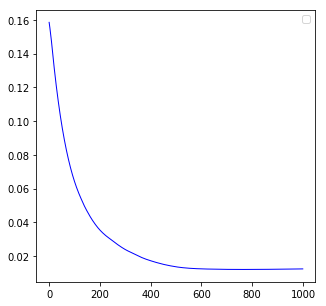

number of features: 104


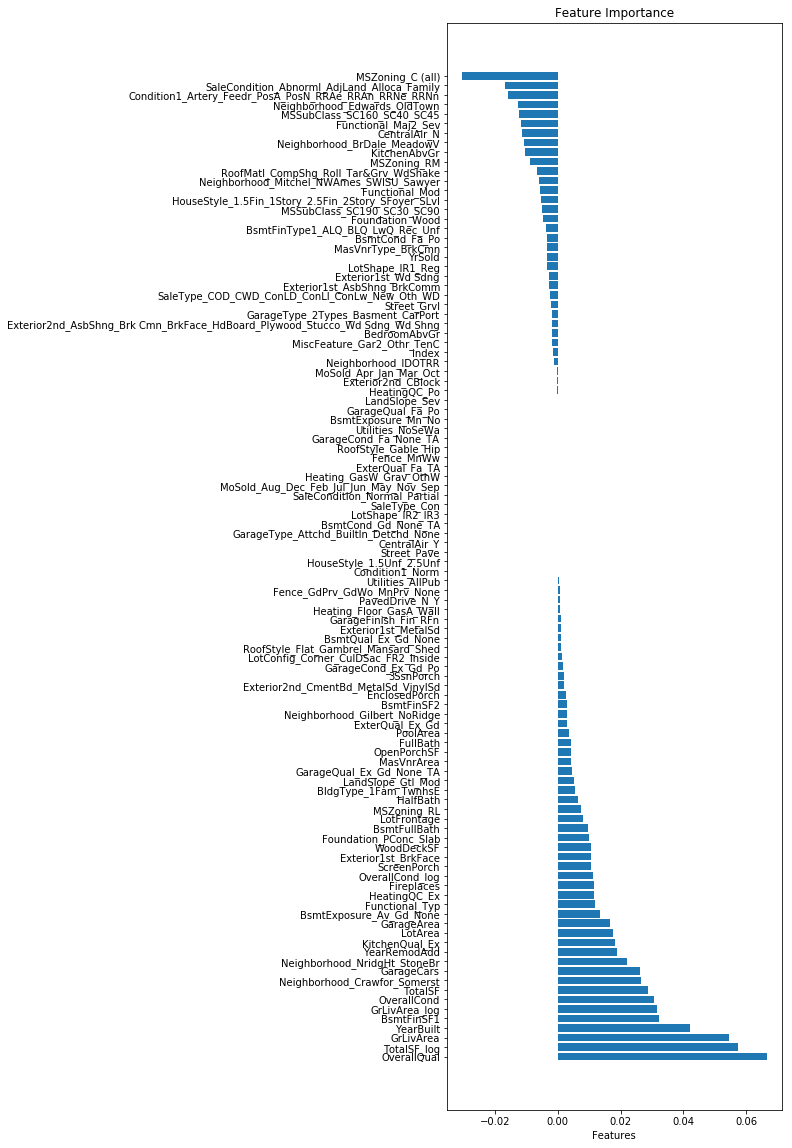

No handles with labels found to put in legend.


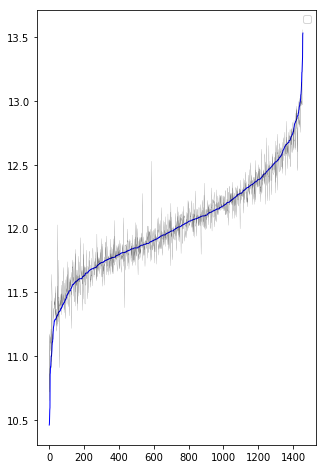

In [126]:
# train lasso
reg = lasso_wrapper(XT,y)
# plot coefficients
coefs,reg.intercept_ = lasso_plot_coef(reg,XT)
# plot estimate
estimate_prices(XT)

**lasso testing rate with 10-fold cross-validation**

In [129]:
def model_validation_score(X,y,model=lassocv,n_split=10,n_repeats=1,msg=False):
    repeatedkfold = RepeatedKFold()
    rkf = RepeatedKFold(n_splits=n_split, n_repeats=n_repeats, random_state=2652124)
    sample = range(0,X.shape[0])
    train_score = []
    test_score = []
    y_train_lst = []
    y_train_estimated_lst = []
    y_test_lst = []
    y_test_estimated_lst = []
    iteration = 1
    for train_index, test_index in rkf.split(sample):
        if (msg==True): print('iteration {}'.format(iteration))
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        reg = model.fit(X_train,y_train)        
        train_score.append(reg.score(X_train,y_train))
        test_score.append(reg.score(X_test,y_test))
        y_train_lst += y_train.tolist()
        y_test_lst += y_test.tolist()
        y_train_estimated_lst += model.predict(X_train).tolist()
        y_test_estimated_lst += model.predict(X_test).tolist()
        iteration += 1
    train_score = np.sqrt(mean_squared_log_error(np.exp(y_train_lst),np.exp(y_train_estimated_lst)))
    test_score = np.sqrt(mean_squared_log_error(np.exp(y_test_lst),np.exp(y_test_estimated_lst)))
    if (msg==True):
        print('train root_mean_squared_log_error: {}'.format(train_score))
        print('test root_mean_squared_log_error: {}'.format(test_score))
    return(train_score,test_score)

**Experiment 1: compare testing error before / after merging categoric features**

In [130]:
# before merging: validation using 10-fold cross-validation
model_validation_score(X,y,n_repeats=10,msg=True)

iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30
iteration 31
iteration 32
iteration 33
iteration 34
iteration 35
iteration 36
iteration 37
iteration 38
iteration 39
iteration 40
iteration 41
iteration 42
iteration 43
iteration 44
iteration 45
iteration 46
iteration 47
iteration 48
iteration 49
iteration 50
iteration 51
iteration 52
iteration 53
iteration 54
iteration 55
iteration 56
iteration 57
iteration 58
iteration 59
iteration 60
iteration 61
iteration 62
iteration 63
iteration 64
iteration 65
iteration 66
iteration 67
iteration 68
iteration 69
iteration 70
iteration 71
iteration 72
iteration 73
iteration 74
iteration 75
iteration 76
iteration 77
iteratio

(0.0956815752237626, 0.11062316479225351)

In [131]:
# before merging: validation using 10-fold cross-validation
model_validation_score(XT,y,n_repeats=10,msg=True)

iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30
iteration 31
iteration 32
iteration 33
iteration 34
iteration 35
iteration 36
iteration 37
iteration 38
iteration 39
iteration 40
iteration 41
iteration 42
iteration 43
iteration 44
iteration 45
iteration 46
iteration 47
iteration 48
iteration 49
iteration 50
iteration 51
iteration 52
iteration 53
iteration 54
iteration 55
iteration 56
iteration 57
iteration 58
iteration 59
iteration 60
iteration 61
iteration 62
iteration 63
iteration 64
iteration 65
iteration 66
iteration 67
iteration 68
iteration 69
iteration 70
iteration 71
iteration 72
iteration 73
iteration 74
iteration 75
iteration 76
iteration 77
iteratio

(0.100183994932513, 0.11032938791588055)

<p><a name="submission"></a></p>

## Submission

In [164]:
submission = pd.read_csv("sample_submission.csv")
# test data
X_train = data.iloc[:n_train,:]
X_test = data.iloc[n_train:,:]
y = np.log1p(SalePrice)
reg = lassocv.fit(X_train,y)
reg.score(X_train,y)
y_estimated = np.exp(reg.predict(X_test))-1
submission['SalePrice'] = y_estimated
submission.to_csv("submission.csv", index=False)